In [1]:
import keras
import model_utils as mutils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
model =mutils.load_net('nvidia_1.h5')

In [2]:
import cv2

In [3]:
cv2.imread('IMG/center_2016_12_01_13_30_48_287.jpg')

array([[[208, 163, 130],
        [208, 163, 130],
        [208, 163, 130],
        ..., 
        [210, 163, 131],
        [210, 163, 131],
        [210, 163, 131]],

       [[208, 163, 130],
        [208, 163, 130],
        [208, 163, 130],
        ..., 
        [210, 163, 131],
        [210, 163, 131],
        [210, 163, 131]],

       [[209, 164, 131],
        [209, 164, 131],
        [209, 164, 131],
        ..., 
        [211, 164, 132],
        [211, 164, 132],
        [211, 164, 132]],

       ..., 
       [[ 83,  99, 112],
        [ 88, 104, 117],
        [ 89, 106, 119],
        ..., 
        [ 99, 116, 135],
        [106, 123, 142],
        [111, 128, 147]],

       [[ 92, 109, 122],
        [ 88, 105, 118],
        [ 82,  99, 112],
        ..., 
        [104, 123, 144],
        [ 96, 115, 136],
        [ 91, 110, 131]],

       [[ 87, 104, 117],
        [ 79,  96, 109],
        [ 79,  95, 111],
        ..., 
        [115, 134, 155],
        [106, 125, 146],
        [ 99, 118,

In [159]:
import numpy.ma as ma
#imgs is an n_rowxn_colXdepth array
def make_mosaic(imgs, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[-1]
    imshape = imgs.shape[0:-1]
    nrows = int(np.ceil(np.sqrt(nimgs)))
    ncols = nrows
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[:,:,i]
    return mosaic

#plt.figure(figsize=(15, 15))
#plt.imshow(make_mosaic(np.random.random((3,3,9)),border=1), cmap='gray')

In [153]:
model.layers

W shape :  (5, 5, 72)


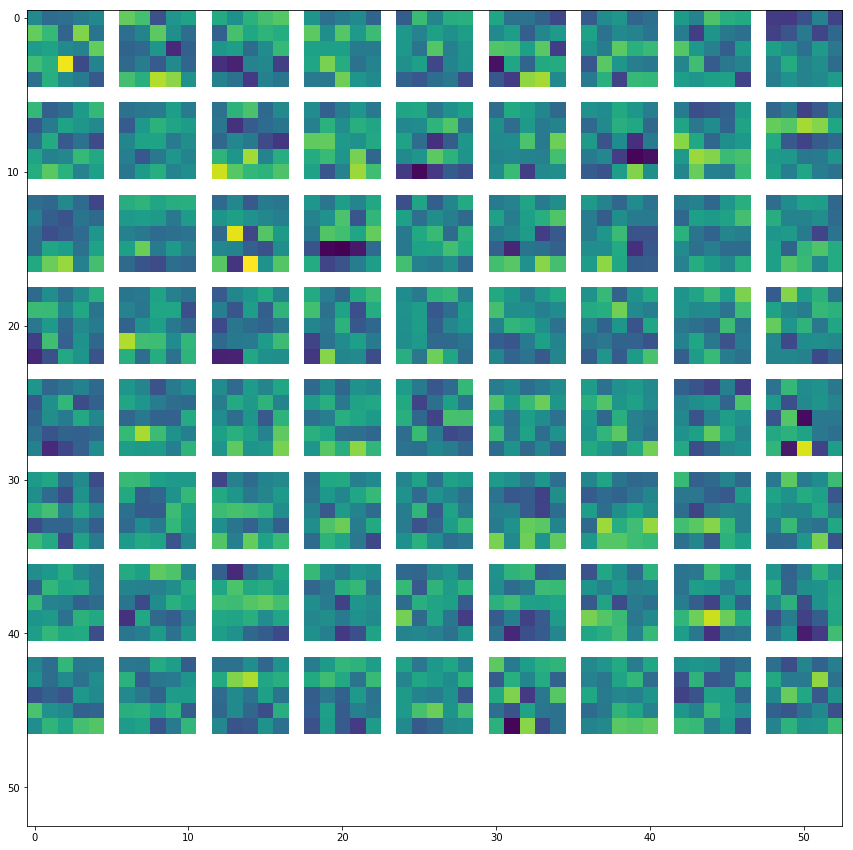

In [161]:
W = model.layers[1].get_weights()[0]
W = W.reshape(*W.shape[0:-2],-1)
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.imshow(make_mosaic(W,border=1))


W shape :  (5, 5, 1728)


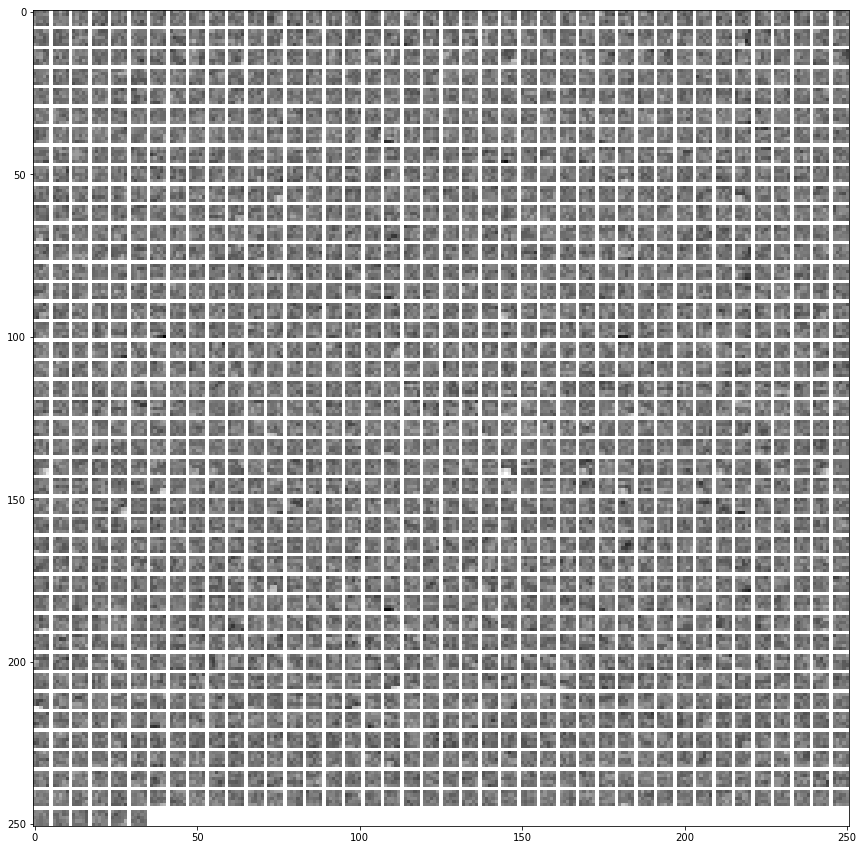

In [162]:
W = model.layers[7].get_weights()[0]
W = W.reshape(*W.shape[0:-2],-1)
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.imshow(make_mosaic(W,border=1), cmap='gray')



In [48]:
model.layers[1].W.get_value()

AttributeError: 'Variable' object has no attribute 'get_value'